In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
from scipy.optimize import curve_fit

In [2]:
sim_list = ['Nbody', 'phantom-vacuum-Sg20-Rc3.5']

basepath = '/n/holystore01/LABS/hernquist_lab/Users/abeane/starbar_runs/runs/'

def read_snap(idx, sim_idx, lvl='lvl3', parttype=[0], fields=['Coordinates', 'Masses', 'Velocities', 'ParticleIDs', 'Potential'],
              basepath = basepath):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output'
    return arepo.Snapshot(fname, idx, parttype=parttype, fields=fields, combineFiles=True)

def read_sfr(sim_idx, lvl='lvl3', basepath = basepath):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output/sfr.txt'
    return np.genfromtxt(fname)

def read_fourier(sim_idx, lvl='lvl3', basepath='/n/home01/abeane/starbar/plots/'):
    sim = sim_list[sim_idx]
    f = h5.File(basepath+'/fourier_component/data/fourier_'+sim+'-'+lvl+'.hdf5', mode='r')
    return f

In [30]:
sn000 = read_snap(0, 1, parttype=[0, 1], fields=None)
sn200 = read_snap(200, 1, parttype=[0, 1], fields=None)

In [40]:
# center = np.array([sn.BoxSize, sn.BoxSize, sn.BoxSize])/2.
def get_M_z(sn):

    center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
    pos = sn.part0.pos.value - center
    R = np.linalg.norm(pos[:,:2], axis=1)

    Rmin = 7.5
    Rmax = 8.5

    Zmin = -0.35
    Zmax = 0.35
    dZ = 0.05

    V_bin = np.pi * (Rmax**2 - Rmin**2) * dZ

    key = np.logical_and(R > 4, R < 4.5)
    bins = np.arange(Zmin, Zmax+dZ, dZ)

    Z = pos[:,2][key]
    M = sn.part0.mass.value[key] * (1-sn.part0.MolecularHFrac[key])
    M_in_bins, _, _ = binned_statistic(Z, M, bins=bins, statistic='sum')
    rho = M_in_bins / V_bin

    z_ave, _, _ = binned_statistic(Z, Z, bins=bins, statistic='mean')
    
    return z_ave, rho
    

In [41]:
def profile(z, rho0, h):
    return rho0 * np.exp(-z**2 / 2 / h**2)

rho0= 0.001426169363734683 h= 0.10959526723367918


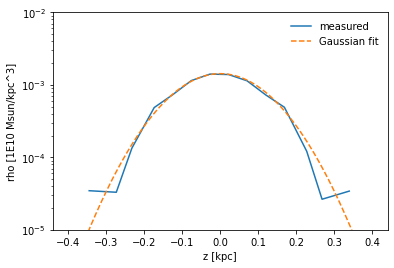

In [42]:
z_ave, rho = get_M_z(sn000)
p, _ = curve_fit(profile, z_ave, rho, p0=[0.01, 0.1])
zlist = np.linspace(-0.4, 0.4, 1000)
gauss_profile = profile(zlist, p[0], p[1])

print('rho0=', p[0], 'h=', p[1])

plt.plot(z_ave, rho, label='measured')
plt.plot(zlist, gauss_profile, ls='dashed', label='Gaussian fit')
plt.yscale('log')
plt.ylim(10.**(-5), 10.**(-2))
plt.xlabel('z [kpc]')
plt.ylabel('rho [1E10 Msun/kpc^3]')
plt.legend(frameon=False)
plt.savefig('gas_scale_height_snap000.png')
# plt.xscale('log')

In [43]:
def exp_profile(z, rho0, h):
    return rho0 * np.exp(-np.abs(z)/(np.sqrt(2*np.pi)/2)/h)

rho0= 0.0019790540114765476 h= 0.07439085828106683


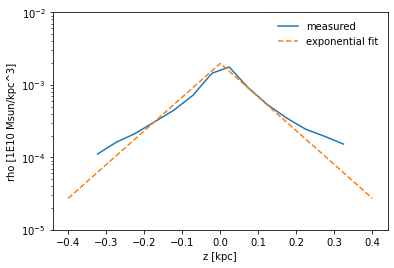

In [44]:
z_ave, rho = get_M_z(sn200)
p, _ = curve_fit(exp_profile, z_ave, rho, p0=[0.01, 0.1])
zlist = np.linspace(-0.4, 0.4, 1000)
gauss_profile = exp_profile(zlist, p[0], p[1])

print('rho0=', p[0], 'h=', p[1])

plt.plot(z_ave, rho, label='measured')
plt.plot(zlist, gauss_profile, ls='dashed', label='exponential fit')
plt.yscale('log')
plt.ylim(10.**(-5), 10.**(-2))
plt.xlabel('z [kpc]')
plt.ylabel('rho [1E10 Msun/kpc^3]')
plt.legend(frameon=False)
plt.savefig('gas_scale_height_snap200.png')
# plt.xscale('log')

In [94]:
p[1]

0.09703971342487602

In [89]:
2.67074 * 0.12

0.32048879999999996

In [103]:
97/320

0.303125

In [51]:
z_ave

array([0.01772996, 0.06902272, 0.12099971, 0.17010625, 0.22133759,
       0.27156443, 0.32296281])

(array([1.9450e+03, 1.3104e+04, 3.3970e+03, 1.3174e+04, 1.5720e+03,
        1.2250e+03, 9.0960e+03, 5.0830e+03, 8.5430e+03, 8.5100e+02,
        3.8820e+03, 4.5800e+02, 5.1000e+03, 3.8370e+03, 3.6100e+02,
        1.0220e+03, 8.7000e+01, 6.9900e+03, 1.0940e+03, 0.0000e+00,
        1.9100e+02, 6.9000e+02, 7.0000e+00, 2.0400e+02, 7.6900e+02,
        2.0000e+01, 9.6400e+02, 2.0000e+00, 2.7000e+01, 9.3000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7110e+03,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.8400e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

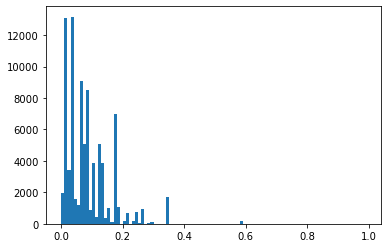

In [23]:
plt.hist(Z, bins=bins)